# WINE - QUALITY RED ASSIGNMENT

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# preprocession, normalizing

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif

# for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# models

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold,cross_val_score


# metrics

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
# Reading the dataset

wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.shape

(1599, 12)

#### There are all together 1599 rows and 12 columns. 11 columns are features and 1 column(quality) is label.

In [5]:
# lets find out is there any null values in all the cloumns

pd.set_option('display.max_rows',None)

wine.info()

# fetching to find count

wine["quality"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### There are all together 12 columns out of 11 are in float and 1 is in integer. There is no null value or missing data in dataset

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### The above gives up few valuable information
#### 1. There is no missing data in dataset
#### 2. There is a outliers in the dataset

In [8]:
# removing the duplicates

wine.drop_duplicates(inplace = True)
wine.shape

(1359, 12)

#### With the help of duplicate command i have removed the duplicate data from the dataset. Previously there were 1599 rows which is now reduced to 1359 rows.

# EDA - Exploratory Data Analysis

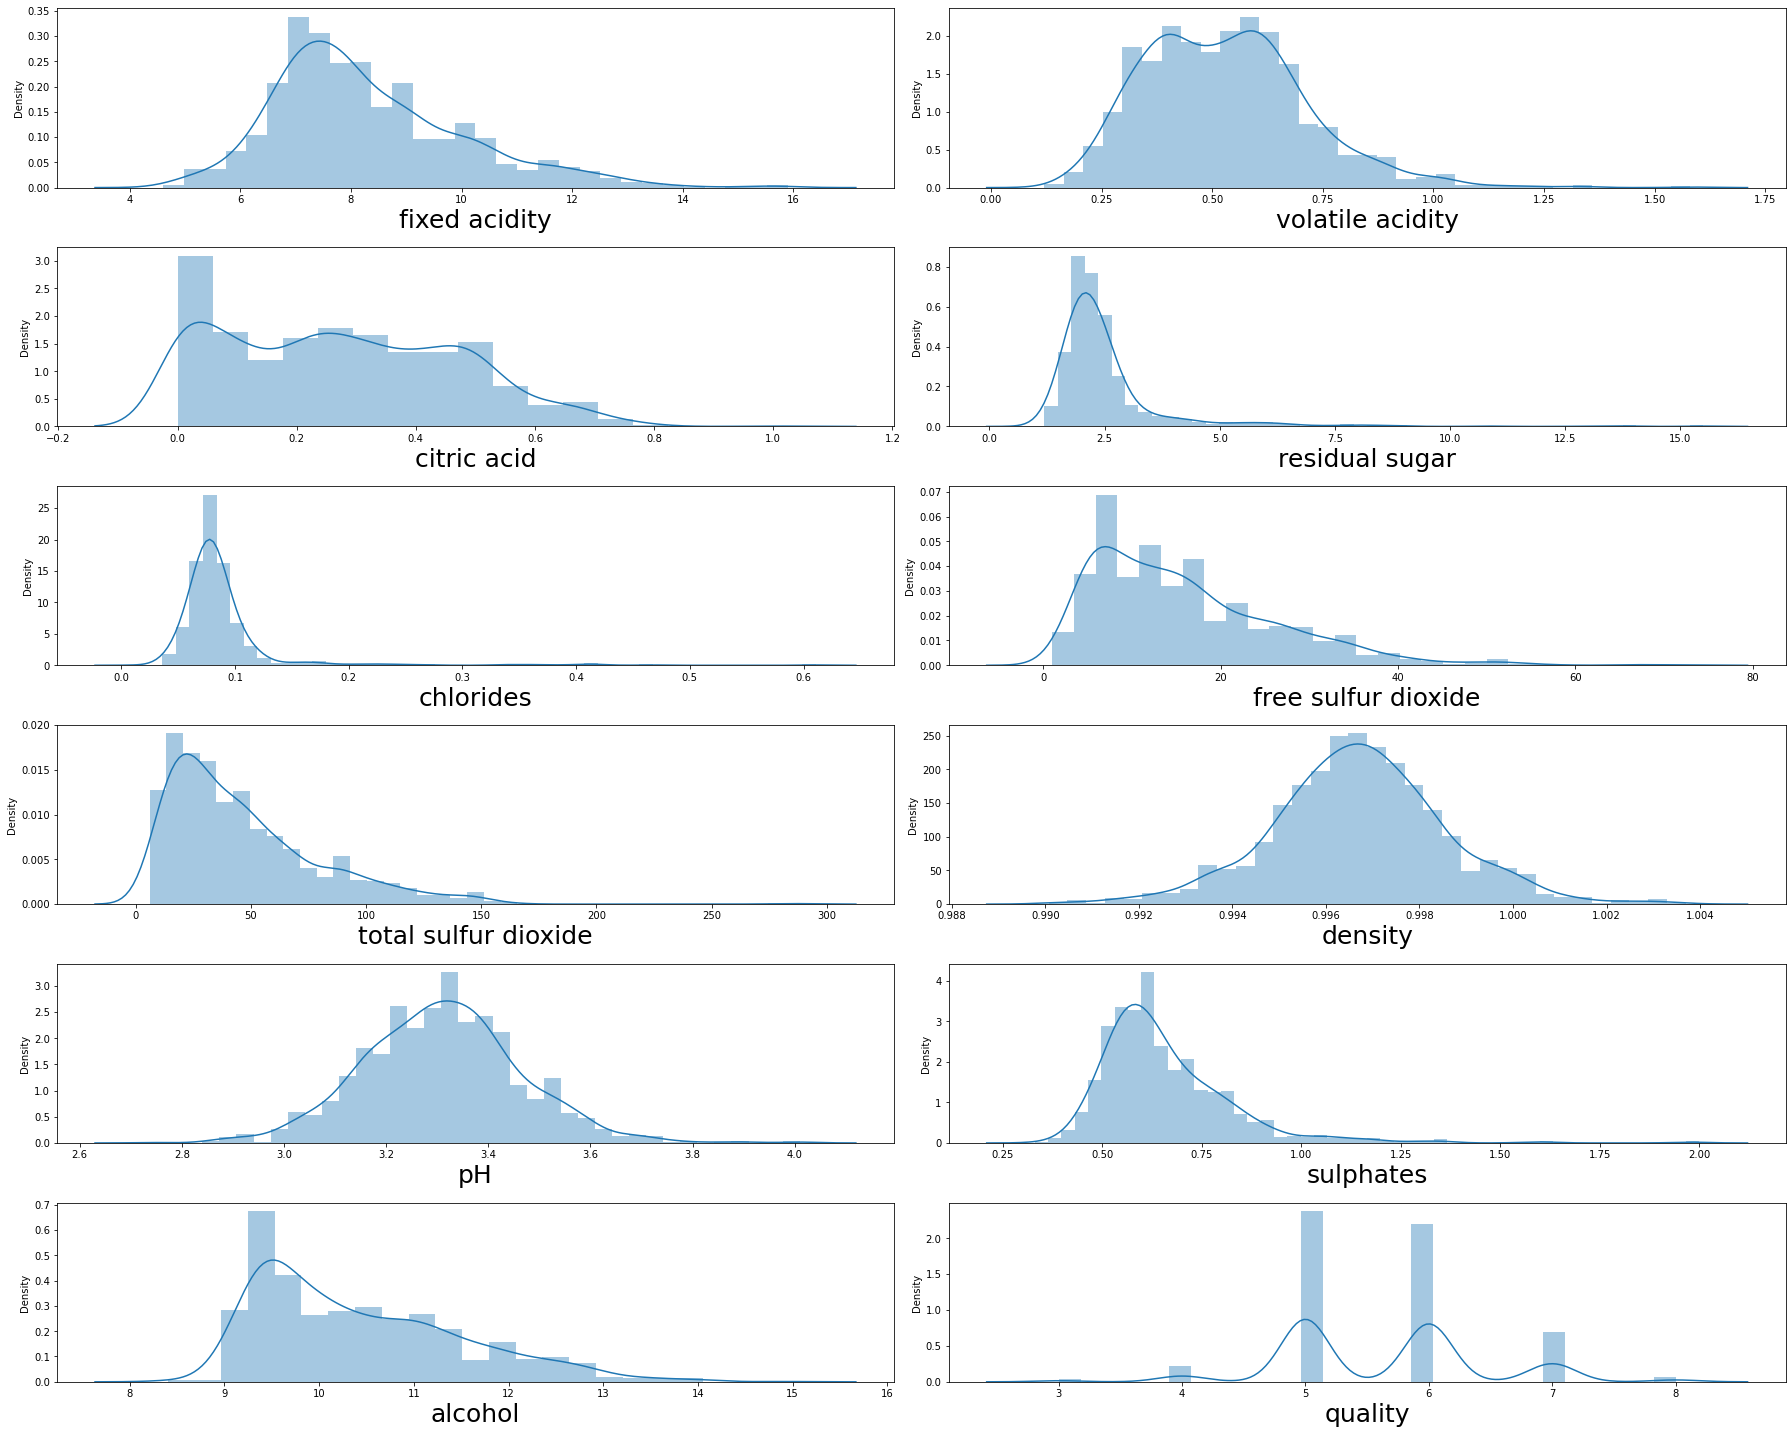

In [13]:
# checking the skewness through distribution plot.

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in wine:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.distplot(wine[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

#### From the above distribution plot, we can see that there is a skewness in the dataset.

### Box Plot

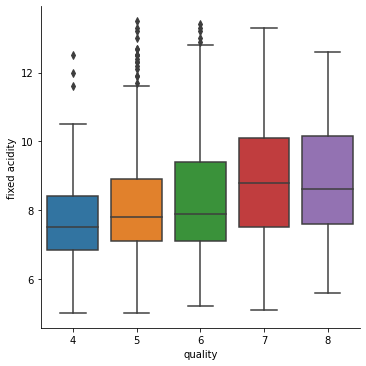

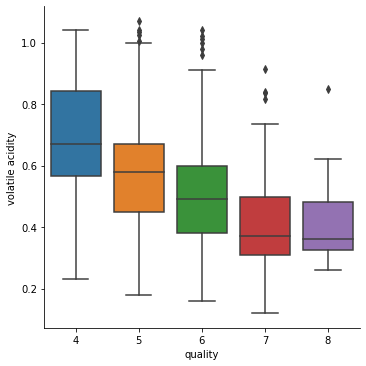

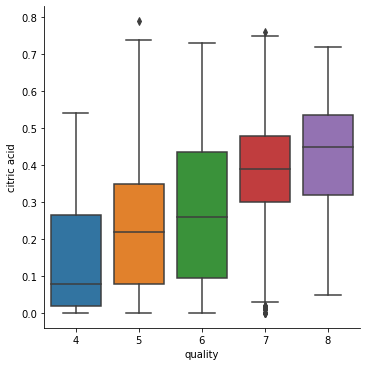

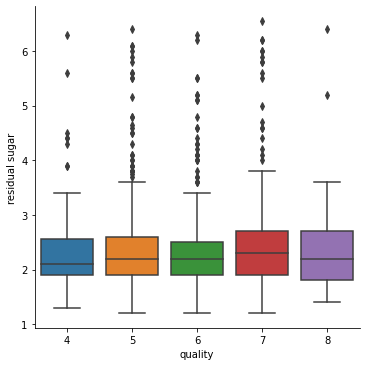

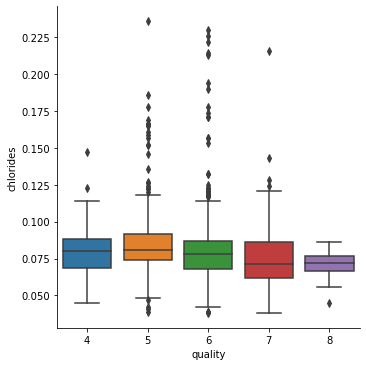

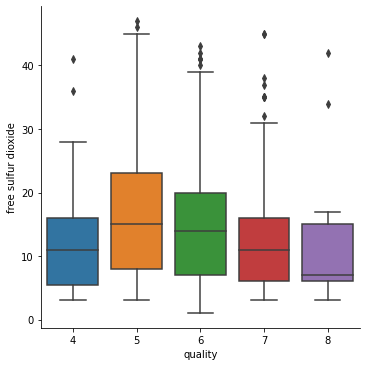

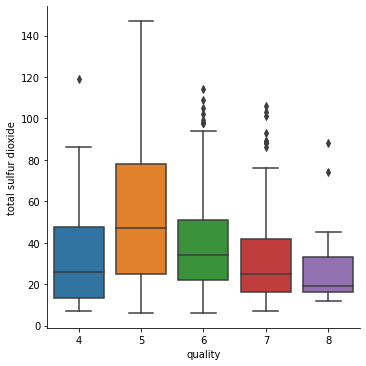

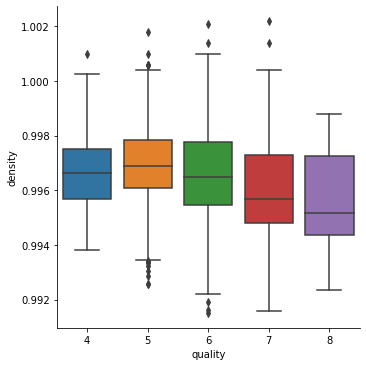

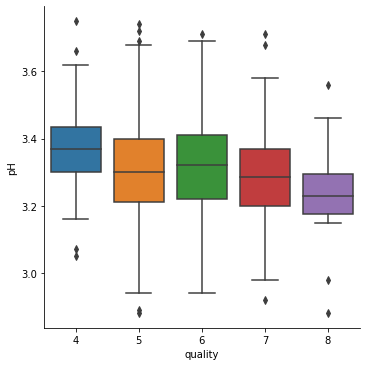

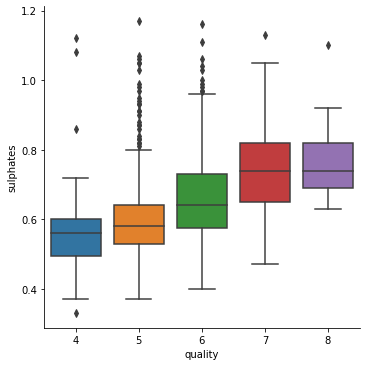

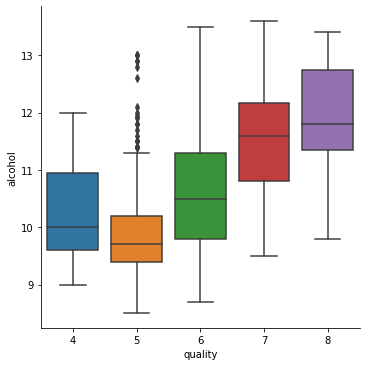

In [72]:
sns.catplot(x="quality", y="fixed acidity", data=wine, kind="box")
sns.catplot(x="quality", y="volatile acidity", data=wine, kind="box")
sns.catplot(x="quality", y="citric acid", data=wine, kind="box")
sns.catplot(x="quality", y="residual sugar", data=wine, kind="box")
sns.catplot(x="quality", y="chlorides", data=wine, kind="box")
sns.catplot(x="quality", y="free sulfur dioxide", data=wine, kind="box")
sns.catplot(x="quality", y="total sulfur dioxide", data=wine, kind="box")
sns.catplot(x="quality", y="density", data=wine, kind="box")
sns.catplot(x="quality", y="pH", data=wine, kind="box")
sns.catplot(x="quality", y="sulphates", data=wine, kind="box")
sns.catplot(x="quality", y="alcohol", data=wine, kind="box");

#### From the above diagrams i.e box plot we used to check outliers.

### Z-Score

In [14]:
# finding out the z score
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(wine))
print(z)


[[0.52443096 0.93200015 1.39325797 ... 0.57856134 0.95437429 0.7570404 ]
 [0.29406274 1.91580043 1.39325797 ... 0.12482157 0.5845748  0.7570404 ]
 [0.29406274 1.25993358 1.18861732 ... 0.05102416 0.5845748  0.7570404 ]
 ...
 [1.38831178 0.11216658 0.88165635 ... 0.59374351 0.7097234  0.45762065]
 [1.38831178 0.63139451 0.77933603 ... 0.3006673  0.21477532 0.7570404 ]
 [1.33071973 1.19956712 1.01126962 ... 0.00759108 0.52482366 0.45762065]]


In [15]:
print(np.where(z > 3)[0])
print(np.where(z > 3)[1])

[  11   12   13   13   15   15   17   30   35   38   39   41   53   75
   75   77   80   82   85   87   96   96   99  114  115  127  135  135
  135  135  144  145  150  150  159  176  202  202  211  214  226  226
  241  245  252  282  295  296  302  309  328  334  346  346  361  363
  385  385  393  400  408  420  420  433  448  450  473  483  483  485
  485  492  506  510  513  516  528  534  555  562  562  564  565  565
  565  582  582  592  597  597  599  602  626  627  632  652  671  672
  687  710  718  722  764  764  771  781  786  791  792  838  866  888
  895  895  912  918  918  920  920  945  948  963  985  994 1003 1013
 1049 1052 1060 1060 1060 1073 1081 1081 1082 1082 1103 1106 1106 1107
 1117 1121 1123 1123 1125 1151 1159 1162 1165 1165 1216 1216 1216 1245
 1250 1250 1250 1253 1276 1325 1325 1336 1350]
[ 9  5  5  6  4  9  4  3  1  4  9  8  5  4  9  4  9  9  9  8  4  9  6  1
  1 10  2  4  8  9  3  3  4  9  4  1  4  9  4  0  4  9  3  4  4  3  9  9
  0  6  0  0  3  5  3  3  

In [16]:
index = (np.where(z > 3)[0])

In [17]:
wine = wine.drop(wine.index[index])
wine.shape

(1232, 12)

#### We have used the Z-Score method to remove the skewness from the dataset.

### Distribution Plot

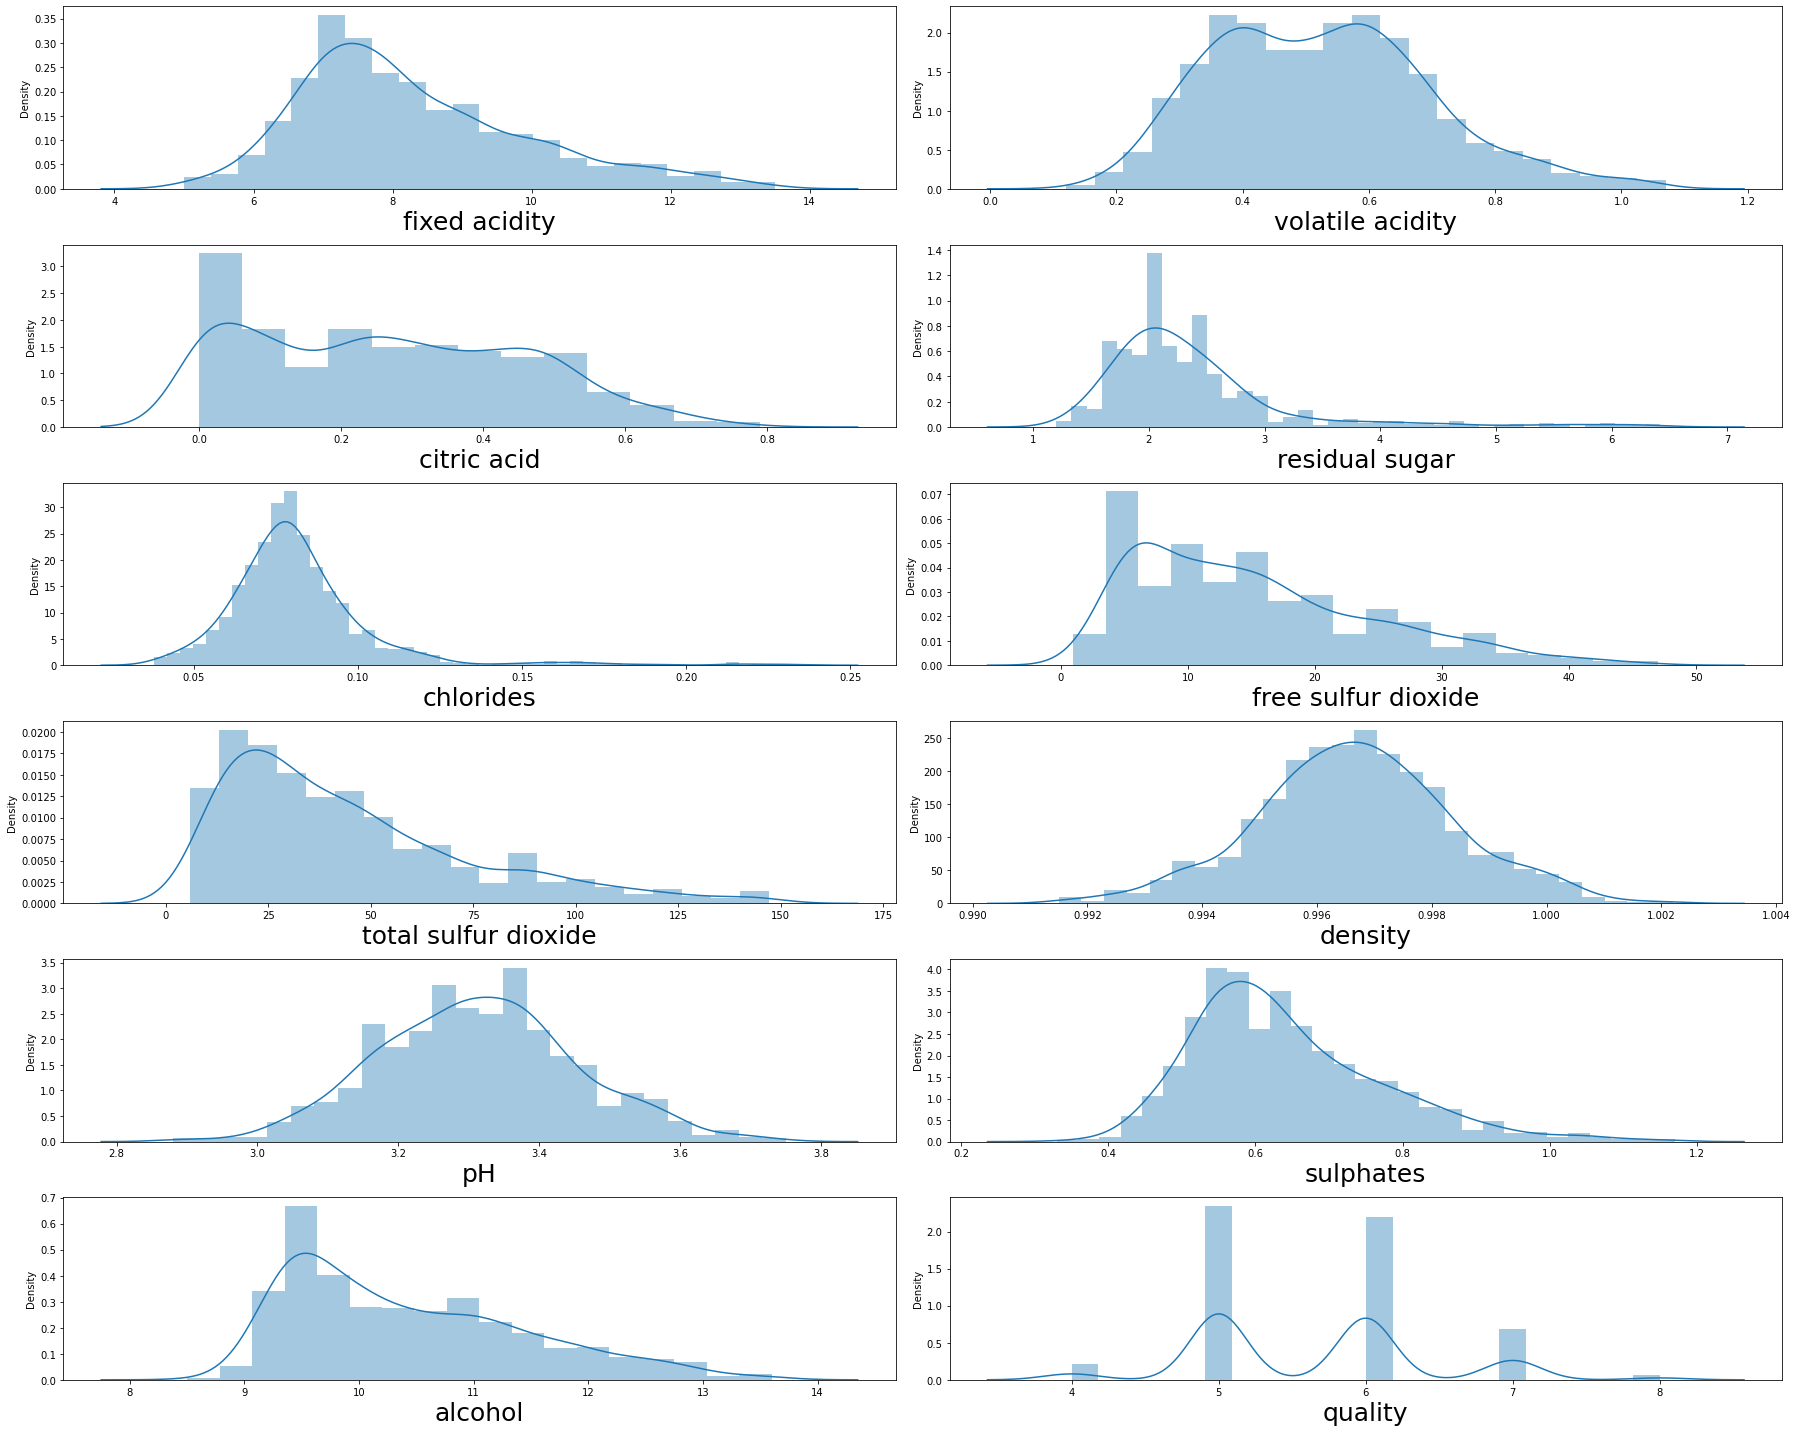

In [18]:
# after removing the skewness

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in wine:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.distplot(wine[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

#### Again we are visualizing the dataset through distribution plot after removing the skewness permanently.

In [20]:
# after removing the skewness we are loading the dataset again.

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [22]:
# dividing features and label

x = wine.drop('quality',axis=1)
y = wine.quality

#### We are dividing the 12 columns from the dataset into features and label.

### StandardScaler

In [34]:
# standard scaler

scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled

array([[-0.54798828,  1.0230202 , -1.39643309, ...,  1.39579596,
        -0.63286796, -0.98817892],
       [-0.30533519,  2.07014562, -1.39643309, ..., -0.80465972,
         0.29112176, -0.6028431 ],
       [-0.30533519,  1.372062  , -1.18665312, ..., -0.37876507,
         0.06012433, -0.6028431 ],
       ...,
       [-1.45793738,  0.15041568, -0.87198316, ...,  1.4667784 ,
         0.90711492,  0.7458323 ],
       [-1.45793738,  0.7030652 , -0.76709317, ...,  1.8216906 ,
         0.5221192 , -0.21750727],
       [-1.3972741 , -1.24575155,  1.06848161, ...,  0.54400666,
         0.13712348,  0.55316438]])

### VIF - variance inflation factor

In [37]:
# finding variance inflation factor(vif)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,7.965548,fixed acidity
1,1.846722,volatile acidity
2,3.143458,citric acid
3,1.612763,residual sugar
4,1.165454,chlorides
5,1.901225,free sulfur dioxide
6,2.185365,total sulfur dioxide
7,6.384851,density
8,3.247685,pH
9,1.320917,sulphates


#### The VIF method is used to find out the relationship between features vs  features. 

## Using SelectKBest feature Selection Method

In [40]:
best_features = SelectKBest(score_func=f_classif, k=9)
fit = best_features.fit(x,y)
wine_scores = pd.DataFrame(fit.scores_)
wine_columns = pd.DataFrame(x.columns)

# concatenate dataframe

feature_scores = pd.concat([wine_columns,wine_scores],axis=1)
feature_scores.columns = ['Feature Name','Score']
print(feature_scores.nlargest(9,'Score'))   # print 6 features

# export selected features to csv
wine_univ_feat = feature_scores.nlargest(9,'Score')

wine_univ_feat.to_csv('variable_selection.csv',index = False)

            Feature Name       Score
10               alcohol  124.186976
9              sulphates   55.721989
1       volatile acidity   47.490969
6   total sulfur dioxide   33.311582
2            citric acid   20.933265
7                density   12.561935
0          fixed acidity    6.641399
4              chlorides    6.129630
5    free sulfur dioxide    5.113217


#### Using SelectKBest feature Selection Method,we have used 9 columns out of 11 to find the best features to predict the models.

## Model Building

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

### Logistic Regression model

In [42]:
# predicting logistic regression

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [44]:
y_pred = log_reg.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.5974025974025974


In [45]:
# confusion matrix

conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[  0,   3,   2,   0,   0],
       [  1, 100,  34,   2,   0],
       [  1,  39,  76,  14,   0],
       [  0,   3,  20,   8,   0],
       [  0,   0,   1,   4,   0]], dtype=int64)

In [46]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         5
           5       0.69      0.73      0.71       137
           6       0.57      0.58      0.58       130
           7       0.29      0.26      0.27        31
           8       0.00      0.00      0.00         5

    accuracy                           0.60       308
   macro avg       0.31      0.31      0.31       308
weighted avg       0.58      0.60      0.59       308



## Logistic Regression model - 60%

### KNeigkhbors model

In [51]:
# predicting KNeigkhbors

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [52]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[ 0,  3,  2,  0,  0],
       [ 2, 88, 42,  5,  0],
       [ 2, 37, 79, 12,  0],
       [ 0,  2, 17, 12,  0],
       [ 0,  0,  2,  3,  0]], dtype=int64)

In [54]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         5
           5       0.68      0.64      0.66       137
           6       0.56      0.61      0.58       130
           7       0.38      0.39      0.38        31
           8       0.00      0.00      0.00         5

    accuracy                           0.58       308
   macro avg       0.32      0.33      0.32       308
weighted avg       0.57      0.58      0.58       308



### Cross Validation -- checking whether the model is overfitting

In [55]:
# cross validation of knn

cross_val_score(knn,x_scaled,y,cv=3)

array([0.49148418, 0.56690998, 0.53170732])

In [56]:
cross_val_score(KNeighborsClassifier(),x_scaled,y,cv=3).mean()

0.5300338258857041

### GridSearchCV

In [57]:
param_grid = {'algorithm':['kdtree','brute'],
               'leaf_size':[15,18,20],
               'n_neighbors':[3,15,7,13]
             }

gridsearch = GridSearchCV(knn,param_grid)
gridsearch.fit(x_train,y_train)

gridsearch.best_params_

{'algorithm': 'brute', 'leaf_size': 15, 'n_neighbors': 15}

In [58]:
# we will use the best parameter in our knn algorithms and check if the accuracy is increasing

knn = KNeighborsClassifier(algorithm='kd_tree',leaf_size=15,n_neighbors=13)

In [59]:
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [60]:
# confusion matrix
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[ 0,  2,  3,  0,  0],
       [ 0, 88, 45,  4,  0],
       [ 1, 36, 82, 11,  0],
       [ 0,  3, 15, 13,  0],
       [ 0,  0,  1,  4,  0]], dtype=int64)

In [61]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         5
           5       0.68      0.64      0.66       137
           6       0.56      0.63      0.59       130
           7       0.41      0.42      0.41        31
           8       0.00      0.00      0.00         5

    accuracy                           0.59       308
   macro avg       0.33      0.34      0.33       308
weighted avg       0.58      0.59      0.59       308



## KNeigkhbors model - 59%

### Decision Tree

In [62]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [63]:
# we are tunning 3 hyper parameter right now, we are pssing the different for both parameter

grid_param = {
     'criterion': ['gini','entropy'],
     'max_depth': range(2,10,3),
     'min_samples_leaf': range(1,10,2),
     'min_samples_split': range(2,10,2)
     }

In [64]:
grid_search = GridSearchCV(estimator = clf,
                          param_grid = grid_param,
                          cv = 3,
                          n_jobs = -1)

In [65]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [66]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [67]:
clf = DecisionTreeClassifier(criterion = 'gini',max_depth = 5, min_samples_leaf = 5, min_samples_split = 2)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.564935064935065

In [68]:
y_pred = clf.predict(x_test)

In [69]:
accuracy_score(y_test,y_pred)

0.564935064935065

In [70]:
print(classification_report(y_test,y_pred,digits = 2))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         5
           5       0.61      0.72      0.66       137
           6       0.54      0.52      0.53       130
           7       0.33      0.26      0.29        31
           8       0.00      0.00      0.00         5

    accuracy                           0.56       308
   macro avg       0.30      0.30      0.30       308
weighted avg       0.54      0.56      0.55       308



## Decision Tree - 56%

# Conclusion 

## According to the above 3 model prediction the best model is logistic regression.

# Saving the models

In [73]:
import pickle

In [74]:
# saving the decision tree model

filename = 'finalized_model.pickle'
pickle.dump(clf,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

In [75]:
# saving the knn model

filename = 'finalized_model.pickle'
pickle.dump(knn,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

In [76]:
# saving the logistic regression model

filename = 'finalized_model.pickle'
pickle.dump(log_reg,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))